# Imports and Downloads
We will use ISLP modules, the numpy and pandas modules, the matplotlib.pyplot module, the statsmodels.api module, the sklearn module, and the scipy module

In [1]:
! pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 3.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=06122fc735ab04d7c6060fcb1773c0e1022a4090b3a770cdd98754dff996237f
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.model_selection import train_test_split
from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from scipy import interpolate
from scipy import optimize
from sklearn.base import clone
from ISLP.models import sklearn_sm

In [3]:
! pip install -q kaggle


#Creating a pathway to the API key from Kaggle so we can import the dataset being used

In [4]:
from google.colab import files

In [5]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"keshavpillutla","key":"eb2bdf548ccee378993125a5f0728b9e"}'}

In [6]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57           5866        126  1.0              
hanaksoy/customer-purchasing-behaviors                           Customer Purchasing Behaviors                         1KB  2024-09-01 22:18:07           3525         51  1.0              
haseebindata/student-performance-predictions                     Student Performance Predictions                       9KB  2024-08-17 06:57:57          11582        247  0.9411765        
computingvictor/2024-academic-ranking-of-world-universi

In [9]:
! kaggle datasets download 'thedevastator/higher-education-predictors-of-student-retention'

Dataset URL: https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention
License(s): CC0-1.0
  0% 0.00/87.2k [00:00<?, ?B/s]
100% 87.2k/87.2k [00:00<00:00, 47.5MB/s]


In [10]:
! rm -rf studentSuccess

In [11]:
! mkdir studentSuccess

In [12]:
! unzip higher-education-predictors-of-student-retention.zip -d studentSuccess

Archive:  higher-education-predictors-of-student-retention.zip
  inflating: studentSuccess/dataset.csv  


In [42]:
np.random.seed(123)

In [13]:
df = pd.read_csv('studentSuccess/dataset.csv')

#Overall dataset we will use for this experiment
The dataset being used is about student performance. It takes multiple factors like gender, nationality, parent status, and shows the status of multiple undergraduate students from Portugal, whether they graduated or dropped out.

https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention

In [14]:
used = df[df['Target'] != 'Enrolled'][["Gender", "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Marital status", "Displaced", "Tuition fees up to date"]]
used["Status"] = df["Target"].map({
    "Graduate": 1
}).fillna(0)
used

,Gender,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Marital status,Displaced,Tuition fees up to date,Status
0,1,13,10,6,10,1,1,1,0.0
1,1,1,3,4,4,1,1,0,1.0
2,1,22,27,10,10,1,1,0,0.0
3,0,23,27,6,4,1,1,1,1.0
4,0,22,28,10,10,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...
4419,1,1,1,6,5,1,0,1,1.0
4420,0,1,1,10,10,1,1,0,0.0
4421,0,22,27,10,10,1,1,1,0.0
4422,0,22,27,8,5,1,1,1,1.0


#Running logistic regression on the overall dataset
We do this by fitting a generalized linear model on the dataset, which here is in an 80/20 training/validation set. We then use the.predict() method do run the logistic regression.

Training set means that the model will know the data knows the results, while in the validation set, it does not know the data or the results of it. Validation goes beyond the scope of the dataset, while training is within the dataset.

In [15]:
allvars = used.columns.drop(['Status'])
design = MS(allvars)
X = design.fit_transform(used)
y = used.Status == 1.0
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
summarize(results)
probs = results.predict()
labels = np.array([0]*used.shape[0])
labels[probs>0.5] = 1
confusion_table(labels, used.Status)
np.mean(labels == used.Status)
used_train, used_valid = train_test_split(used, test_size=(int(used.shape[0]*1/5)), random_state=0)
x_train = design.fit_transform(used_train)
y_train = used_train['Status']
glm = sm.GLM(y_train, x_train, family=sm.families.Binomial())
results = glm.fit()
x_valid = design.transform(used_valid)
y_valid = used_valid['Status']
valid_pred = results.predict(x_valid)
np.mean((y_valid - valid_pred)**2)

0.182085021853838

#Finding independence proportion so we can use it later
The independence proportion is simply what proportion of the people in the overall training set actually dropped out.

It will stored in the variable indproportion and will be used to calculate independence.

In [16]:
indproportion = 1 - used_train["Status"].mean()
indproportion

0.387396694214876

#Finding sufficiency predictive positive value using the one from the overall logistic regression being run so we can use it later
The positive predictive value we find here is simply the one from the logistic regression ran on the overall dataset.

It will be stored in the variable sufppv and will be used to calculate sufficiency.

In [17]:
sufppv = ((y == 1) & (probs>0.5)).sum()/max((probs>0.5).sum(), 1)
sufppv

0.7168358417920896

#Splitting overall dataset into two different datasets, one for male and one for female, and running a logistic regression on each of these new datasets
This is so that we can find the information from the logistic regression (like true and false positive rates) run on the dataset for each gender.

This means we can compare and contrast this information about each dataset to deduce where the three fairness criteria are satisfied.

In [18]:
usedm = used[used['Gender'] == 1][["Gender", "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Marital status", "Displaced", "Tuition fees up to date", "Status"]]
usedm

,Gender,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Marital status,Displaced,Tuition fees up to date,Status
0,1,13,10,6,10,1,1,1,0.0
1,1,1,3,4,4,1,1,0,1.0
2,1,22,27,10,10,1,1,0,0.0
5,1,22,27,10,8,2,0,1,1.0
7,1,22,27,10,10,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...
4409,1,22,27,5,2,2,0,1,1.0
4410,1,22,14,10,5,1,0,1,1.0
4411,1,22,27,10,4,1,1,1,0.0
4418,1,3,28,4,10,1,0,1,1.0


In [19]:
allvarsm = usedm.columns.drop(['Status'])
designm = MS(allvarsm)
usedm_train, usedm_valid = train_test_split(usedm, test_size=(int(usedm.shape[0]*1/5)), random_state=0)
x_trainm = designm.fit_transform(usedm_train)
y_trainm = usedm_train['Status']
glm1 = sm.GLM(y_trainm, x_trainm, family=sm.families.Binomial())
resultsm = glm1.fit()
x_validm = designm.transform(usedm_valid)
y_validm = usedm_valid['Status']
valid_predm = resultsm.predict(x_validm)
np.mean((y_validm - valid_predm)**2)
labelsm = np.array([0]*usedm_valid.shape[0])
labelsm[valid_predm>0.5] = 1
confusion_table(labelsm, usedm_valid.Status)

Truth,0.0,1.0
Predicted,,
0.0,71,31
1.0,60,87


In [20]:
usedf = used[used['Gender'] == 0][["Gender", "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Marital status", "Displaced", "Tuition fees up to date", "Status"]]
usedf

,Gender,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Marital status,Displaced,Tuition fees up to date,Status
3,0,23,27,6,4,1,1,1,1.0
4,0,22,28,10,10,2,0,1,1.0
6,0,13,28,8,11,1,1,1,1.0
8,0,1,1,10,10,1,0,1,1.0
9,0,1,14,5,8,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...
4417,0,1,1,10,10,1,1,1,1.0
4420,0,1,1,10,10,1,1,0,0.0
4421,0,22,27,10,10,1,1,1,0.0
4422,0,22,27,8,5,1,1,1,1.0


In [21]:
allvarsf = usedf.columns.drop(['Status'])
designf = MS(allvarsf)
usedf_train, usedf_valid = train_test_split(usedf, test_size=(int(usedf.shape[0]*1/5)), random_state=0)
x_trainf = designf.fit_transform(usedf_train)
y_trainf = usedf_train['Status']
glm2 = sm.GLM(y_trainf, x_trainf, family=sm.families.Binomial())
resultsf = glm2.fit()
x_validf = designf.transform(usedf_valid)
y_validf = usedf_valid['Status']
valid_predf = resultsf.predict(x_validf)
np.mean((y_validf - valid_predf)**2)
labelsf = np.array([0]*usedf_valid.shape[0])
labelsf[valid_predf>0.75] = 1
confusion_table(labelsf, usedf_valid.Status)

Truth,0.0,1.0
Predicted,,
0.0,75,112
1.0,69,220


#Getting true and false positive rates for males and females at each threshold
Threshold meaning: A logistic regression outputs the predictive probabilities of the graduation status of each student. If these probabilities are over a certain thresholds, the model will output the student as a graduate. Changing this value allows us to audit the model to satisfy the three fairness criteria.

We will use these for computing the fairness criteria.

In [22]:
fpr1, tpr1, thresholdsm = roc_curve(y_validm, valid_predm)
fpr2, tpr2, thresholdsf = roc_curve(y_validf, valid_predf)

In [23]:
thresholds = np.concatenate((thresholdsm, thresholdsf))
thresholds = np.sort(thresholds)[::-1]

#Redefining true and false positive rates for males and females and calculating them manually so it will be easier to use when computing fairness criteria

In [24]:
tprm = np.zeros(len(thresholds))
tprf = np.zeros(len(thresholds))
fprm = np.zeros(len(thresholds))
fprf = np.zeros(len(thresholds))
for i in range(len(thresholds)):
  tprm[i] = ((y_validm == 1) & (valid_predm > thresholds[i])).sum()/(y_validm == 1).sum()
  fprm[i] = ((y_validm == 0) & (valid_predm > thresholds[i])).sum()/(y_validm == 0).sum()
  tprf[i] = ((y_validf == 1) & (valid_predf > thresholds[i])).sum()/(y_validf == 1).sum()
  fprf[i] = ((y_validf == 0) & (valid_predf > thresholds[i])).sum()/(y_validf == 0).sum()

#Computing the thresholds at which independence is satisfied, and then using that information to find the true and false positive rates
We must first take the quantile of the indproportion we calculated earlier in this notebook, or at what thresholds do [indproportion calculated earlier] drop out. Then we must see what the true and false positive rates are at these thresholds.

In [25]:
indm = valid_predm.quantile(q = indproportion)
indf = valid_predf.quantile(q = indproportion)
indm, indf

(0.49458353460678645, 0.7486596640401602)

In [26]:
thresholds[indf > thresholds][0], tprf[indf > thresholds][0], fprf[indf > thresholds][0]

(0.7479051790096595, 0.677710843373494, 0.4791666666666667)

In [27]:
thresholds[indm > thresholds][0], tprm[indm > thresholds][0], fprm[indm > thresholds][0]

(0.4944764158539425, 0.7711864406779662, 0.46564885496183206)

#Calculating how much error there is in separation and sufficiency when independence is satisfied

In [28]:
sepatindt = abs(tprm[indm > thresholds][0] - tprf[indf > thresholds][0])
sepatindf = abs(fprm[indm > thresholds][0] - fprf[indf > thresholds][0])
sepatindf, sepatindt

(0.013517811704834626, 0.09347559730447219)

In [29]:
indpredictedvaluesm = np.array([0]*usedm_valid.shape[0])
indpredictedvaluesm[valid_predm>thresholds[indm > thresholds][0]] = 1
indpredictedvaluesf = np.array([0]*usedf_valid.shape[0])
indpredictedvaluesf[valid_predf>thresholds[indf > thresholds][0]] = 1
sufatindm = ((y_validm == 1) & (indpredictedvaluesm == 1)).sum()/max((indpredictedvaluesm == 1).sum(), 1)
sufatindf = ((y_validf == 1) & (indpredictedvaluesf == 1)).sum()/max((indpredictedvaluesf == 1).sum(), 1)
sufatind = abs(sufatindf - sufatindm)
sufatind

0.16662191192266373

#Computing the threshold at which separation is satisfied, and then using that information to find the true and false positive rates
We must interpolate the true and false positive rates so that we have a function of x that we can find the root of to get a false positive rate, and thereby getting a true positive rate as well. We also interpolate the thresholds to get another function of x so we can see at what threshold separation is satisfied.

In [30]:
graphm = interpolate.interp1d(fprm, tprm, bounds_error=False)
graphf = interpolate.interp1d(fprf, tprf, bounds_error=False)
allthresh = interpolate.interp1d(fprm, thresholds, bounds_error=False)
def f(x):
  return graphm(x) - graphf(x)
separation = optimize.root_scalar(f, bracket=[0, 0.99])
separation.root, float(graphm(separation.root)), float(allthresh(separation.root))

(0.694444444444946, 0.9661016949152542, 0.026441736887409233)

#Calculating how much error there is in independence and sufficiency when separation is satisfied

In [31]:
seppredictedvaluesm = np.array([0]*usedm_valid.shape[0])
seppredictedvaluesm[valid_predm>float(allthresh(separation.root))] = 1
seppredictedvaluesf = np.array([0]*usedf_valid.shape[0])
seppredictedvaluesf[valid_predf>float(allthresh(separation.root))] = 1

In [32]:
indatsep = abs(seppredictedvaluesf.mean() - seppredictedvaluesm.mean())
indatsep

0.1807228915662651

In [33]:
sufatsepm = ((y_validm == 1) & (seppredictedvaluesm == 1)).sum()/max((seppredictedvaluesm == 1).sum(), 1)
sufatsepf = ((y_validf == 1) & (seppredictedvaluesf == 1)).sum()/max((seppredictedvaluesf == 1).sum(), 1)
sufatsep = abs(sufatsepf - sufatsepm)
sufatsep

0.1386554621848739

#Computing the thresholds at which sufficiency is satisfied, and then using that information to find the true and false positive rates
We first create two arrays of positive predictive values for males and females, and fill them with positive predictive values at each threshold. We use the isfinite() function on the thresholds array so that we can use it to calculate positive predictive value. We then interpolate the positive predictive values at each thresholds, with the function outputting the thresholds of the positive predictive values. Using this function, we can use the positive predictive value that we found earlier, which we wanted to equalize, and get thresholds at which sufficiency is satisfied.

In [34]:
ppvm = np.zeros(len(thresholds))
ppvf = np.zeros(len(thresholds))
for i in range(len(thresholds)):
  ppvm[i] = ((y_validm == 1) & (valid_predm > thresholds[i])).sum()/max((valid_predm > thresholds[i]).sum(), 1)
  ppvf[i] = ((y_validf == 1) & (valid_predf > thresholds[i])).sum()/max((valid_predf > thresholds[i]).sum(), 1)

In [35]:
finitethresh = np.isfinite(thresholds)
allppvm = interpolate.interp1d(ppvm[finitethresh], thresholds[finitethresh], bounds_error=False)
allppvf = interpolate.interp1d(ppvf[finitethresh], thresholds[finitethresh], bounds_error=False)
float(allppvm(sufppv)), float(allppvf(sufppv))

(0.6138532632939664, 0.8029223520685845)

In [36]:
thresholds[float(allppvm(sufppv)) > thresholds][0], tprm[float(allppvm(sufppv)) > thresholds][0], fprm[float(allppvm(sufppv)) > thresholds][0]

(0.6124087890848479, 0.1271186440677966, 0.04580152671755725)

In [37]:
thresholds[float(allppvf(sufppv)) > thresholds][0], tprf[float(allppvf(sufppv)) > thresholds][0], fprf[float(allppvf(sufppv)) > thresholds][0]

(0.8023337809737703, 0.3253012048192771, 0.3055555555555556)

#Calculating how much error there is in independence and separation when sufficiency is satisfied

In [38]:
sufpredictedvaluesm = np.array([0]*usedm_valid.shape[0])
sufpredictedvaluesm[valid_predm>thresholds[float(allppvm(sufppv))>thresholds][0]] = 1
sufpredictedvaluesf = np.array([0]*usedf_valid.shape[0])
sufpredictedvaluesf[valid_predf>thresholds[float(allppvf(sufppv)) > thresholds][0]] = 1
indatsuf = abs(sufpredictedvaluesf.mean() - sufpredictedvaluesm.mean())
indatsuf

0.2349903816948466

In [39]:
sepatsuft = abs(tprm[float(allppvm(sufppv)) > thresholds][0] - tprf[float(allppvf(sufppv)) > thresholds][0])
sepatsuff = abs(fprm[float(allppvm(sufppv)) > thresholds][0] - fprf[float(allppvf(sufppv)) > thresholds][0])
sepatsuff, sepatsuft

(0.2597540288379983, 0.1981825607514805)

#Plotting all these true and false positive rates where all these fairness criteria are satisfied (Gives us points on the ROC curve where they are satisfied)
On the plot, we can clearly see the points at which independence, separation, and sufficiency are satisfied so we can understand their mutual exclusivity.

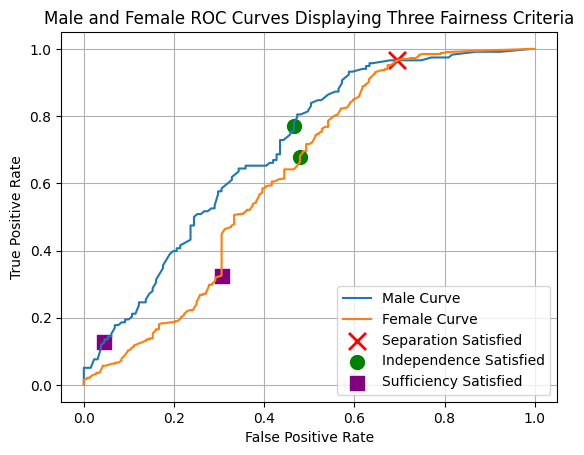

In [41]:
plt.plot(fprm, tprm, label='Male Curve')
plt.plot(fprf, tprf, label='Female Curve')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.scatter(separation.root, float(graphm(separation.root)), s=150, marker="x", c="red", linewidths = 2, label='Separation Satisfied')
plt.scatter(fprf[indf > thresholds][0], tprf[indf > thresholds][0], s=100, marker="o", c="green", label='Independence Satisfied')
plt.scatter(fprm[indm > thresholds][0], tprm[indm > thresholds][0], s=100, marker="o", c="green")
plt.scatter(fprf[float(allppvf(sufppv)) > thresholds][0], tprf[float(allppvf(sufppv)) > thresholds][0], s=100, marker="s", c="purple", label='Sufficiency Satisfied')
plt.scatter(fprm[float(allppvm(sufppv)) > thresholds][0], tprm[float(allppvm(sufppv)) > thresholds][0], s=100, marker="s", c="purple")
plt.legend()
plt.title('Male and Female ROC Curves Displaying Three Fairness Criteria')
plt.grid()
plt.show()